<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##File upload

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/Filareth2015/DA_and_ML_Python/master/advertising.csv')



In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df['Total_spend']= df['TV']+df['Radio']+df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales,Total_spend
1,230.1,37.8,69.2,22.1,337.1
2,44.5,39.3,45.1,10.4,128.9
3,17.2,45.9,69.3,9.3,132.4
4,151.5,41.3,58.5,18.5,251.3
5,180.8,10.8,58.4,12.9,250.0


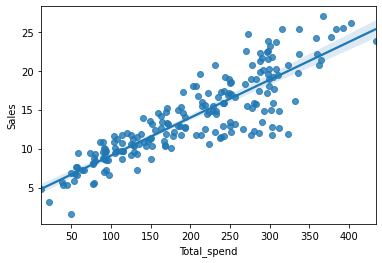

In [6]:
sns.regplot(data=df, x='Total_spend', y='Sales')

In [7]:
X = df["Total_spend"]
y = df['Sales']

In [8]:
# y=B1X+B0

In [9]:
np.polyfit(X,y, deg=1)

array([0.04868788, 4.24302822])

In [10]:
potential_sales = np.linspace(1,500,100)
predicted_sales = 0.04868788 *potential_sales + 4.24302822

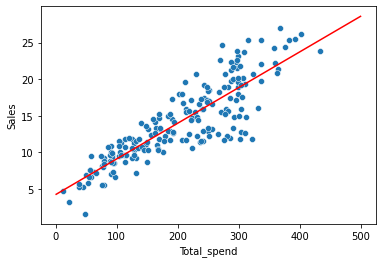

In [11]:
sns.scatterplot(data =df, x = "Total_spend", y = 'Sales')
plt.plot(potential_sales, predicted_sales, color ='red')

In [12]:
np.polyfit(X, y, deg =3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [13]:
# y = B3X**3 +  B2X**2 + B1X + B0
sd = np.linspace(1,500,100)
ex_sd = 3.07615033e-07*sd**3 +-1.89392449e-04 *sd**2 +8.20886302e-02*sd + 2.70495053e+00

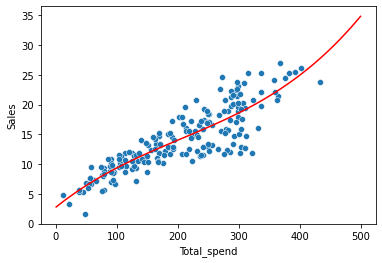

In [14]:
sns.scatterplot(data =df, x = "Total_spend", y = 'Sales')
plt.plot(sd, ex_sd, color ='red')

###Multiple features

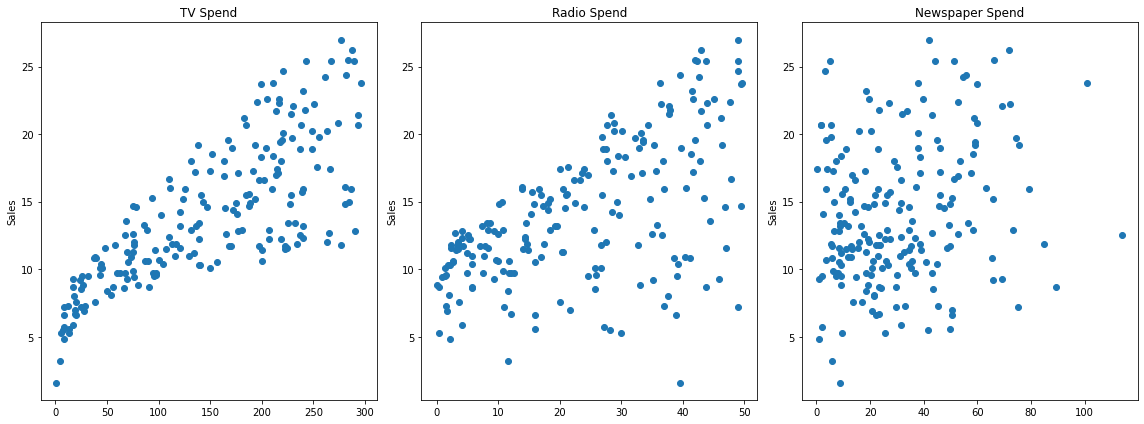

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [16]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Filareth2015/DA_and_ML_Python/master/advertising.csv')

## Scikit for LinearRegression

#### Train_test_split

In [17]:
X = df1.drop('Sales', axis=1)
y= df1["Sales"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =101)

In [20]:
#y_test

##Creating Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
test_predctions = model.predict(X_test) 

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
df1['Sales'].mean()

14.022500000000003

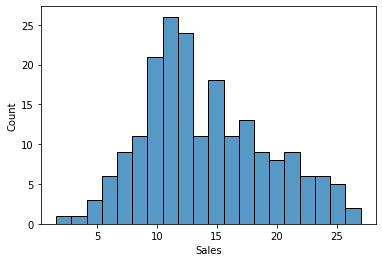

In [27]:
sns.histplot(data =df, x='Sales', bins=20)

In [28]:
mean_absolute_error(y_test, test_predctions)

1.2137457736144808

In [29]:
np.sqrt(mean_squared_error(y_test, test_predctions)) # RMSE

1.5161519375993882

## Resuduals

In [31]:
test_resduals= y_test - test_predctions
test_resduals.shape

(60,)

#### Residual plot

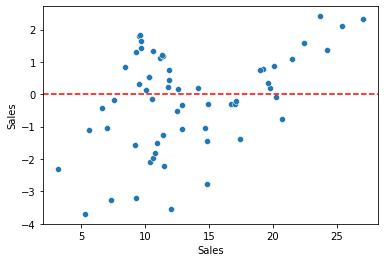

In [32]:
sns.scatterplot(x = y_test, y = test_resduals)
plt.axhline(y=0, color ='red', ls='--')

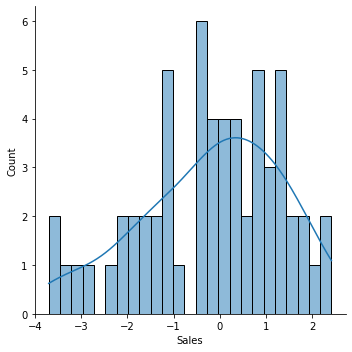

In [33]:
sns.displot(test_resduals, bins=25, kde=True)

In [35]:
import scipy as sp

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-3.69806574, -3.55228966, -3.28105585, -3.20719678, -2.76285075,
         -2.30870279, -2.22541098, -

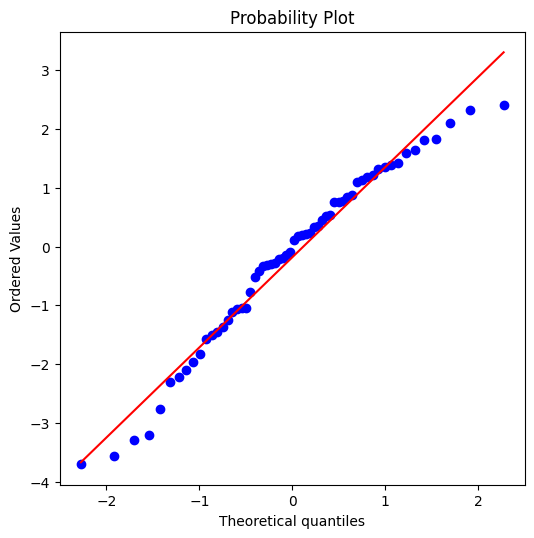

In [36]:
fig,ax = plt.subplots(figsize =(6,6), dpi=100)
sp.stats.probplot(test_resduals, plot=ax)

### Model Deployment

In [37]:

df1 = pd.read_csv('https://raw.githubusercontent.com/Filareth2015/DA_and_ML_Python/master/advertising.csv')

In [38]:
final_model=LinearRegression()
final_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [40]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [41]:
y_hat = final_model.predict(X)

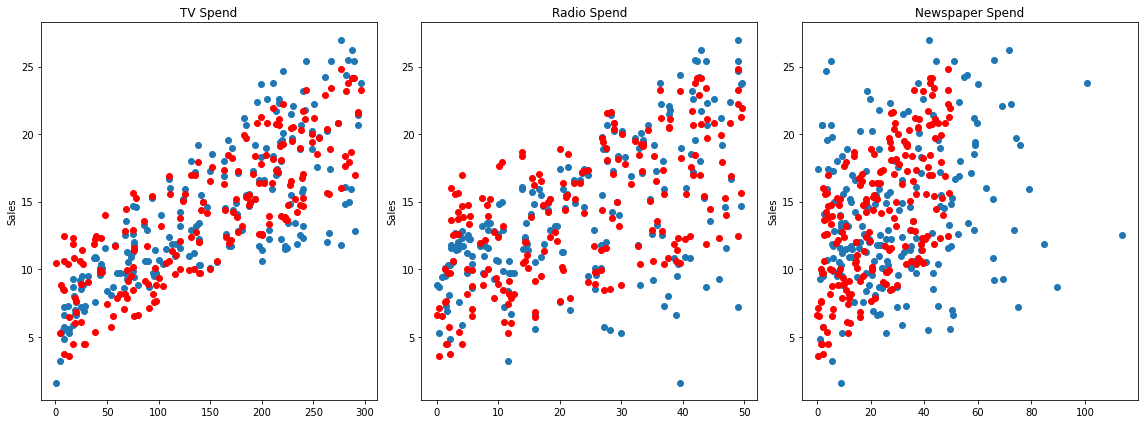

In [42]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df1['TV'],df1['Sales'],'o')
axes[0].plot(df1['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df1['Radio'],df1['Sales'],'o')
axes[1].plot(df1['Radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df1['Newspaper'],df1['Sales'],'o')
axes[2].plot(df1['Radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [43]:
from joblib import dump, load

In [44]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [45]:
loaded_model = load('final_sales_model.joblib')
loaded_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
campaign =[[149, 22,12]]
loaded_model.predict(campaign)

array([13.893032])

## Polynomal Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
polynomial_converter =PolynomialFeatures(degree=2, include_bias=False)

polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)

poly_features.shape


(200, 9)

In [49]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [50]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

### Train and test set split in polynomial regression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state =101)

In [52]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
poly_predictions = model1.predict(X_test)

In [54]:
MAE =mean_absolute_error(y_test,poly_predictions)
MSE = mean_squared_error(y_test,poly_predictions)
RMSE = np.sqrt(MSE)
print(MAE, MSE, RMSE)

0.4896798044803836 0.4417505510403753 0.6646431757269274


In [55]:
model1.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [66]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state =101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [67]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.4339344356902069,
 0.3517083688399346,
 0.2509342962601729,
 0.20872723323990613,
 5.42157751435276,
 0.14086751582412702,
 0.17118580360234556]

In [68]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269274,
 0.580328682521562,
 0.5077742637898885,
 2.57581412209716,
 4.335318691649055,
 1379.1716104914929,
 4129.060813616151,
 96107.72947631204]

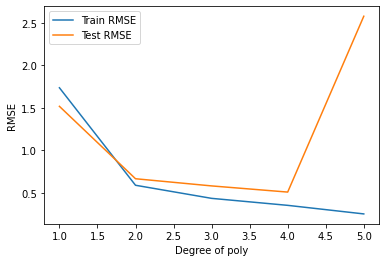

In [73]:
plt.plot(range(1,6), train_rmse_errors[:5], label = "Train RMSE")
plt.plot(range(1,6), test_rmse_errors[:5], label = "Test RMSE")
plt.xlabel("Degree of poly")
plt.ylabel("RMSE")
plt.legend()

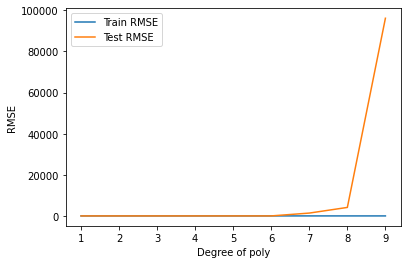

In [75]:
plt.plot(range(1,10), train_rmse_errors, label = "Train RMSE")
plt.plot(range(1,10), test_rmse_errors, label = "Test RMSE")
plt.xlabel("Degree of poly")
plt.ylabel("RMSE")
plt.legend()

In [76]:
final_poly_converter = PolynomialFeatures(degree =3, include_bias =False)

final_model = LinearRegression()


In [77]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
dump(final_model, 'Final_Poly_Model.joblib')
dump(final_poly_converter, 'Final_Poly_Converter.joblib')

['Final_Poly_Converter.joblib']

In [82]:
loaded_model = load('Final_Poly_Model.joblib')
loaded_converter = load('Final_Poly_Converter.joblib')

In [86]:
campaign1 = [[149, 22, 12]]

transformed_data = loaded_converter.fit_transform(campaign1)

In [87]:
loaded_model.predict(transformed_data)

array([14.64501014])